In [12]:
import matplotlib.pyplot as plt

# Run to get functions

# Result
def calculate_developments(monthly_dev: list[float], init_equity: float, monthly_added_value: float, profit_sharing: bool = True) -> list[float]:
    """"
    Calculate the monthly developments based on initial equity, monthly added value, and profit sharing.
    profit_sharing: If True, deduct 25% of the profit from each month's gain.
    monthly_dev: List of monthly percentage changes.
    init_equity: Initial equity amount.
    monthly_added_value: Amount added to equity each month.
    Returns a list of equity values for each month.
    """
    monthly_res = []
    monthly_res_with_monthly_payments = []
    equity = init_equity
    for interest in monthly_dev:
        delta = equity * interest/100
        equity = equity + delta
        if delta > 0 and profit_sharing: # profit_sharing
            equity = equity - (delta * (25/100))
        monthly_res.append(equity)
        equity = equity + monthly_added_value
        
    return monthly_res

def plot_equity(months: list[str], monthly_res: list[float], monthly_res_with_monthly_payments: list[float], equity_plus_monthly_payments: list[float]) -> None:
    plt.figure()
    plt.plot(months, monthly_res, marker="o", label="Without monthly payments")   # or use plt.bar(months, monthly_dev)
    plt.plot(months, monthly_res_with_monthly_payments, marker="o", label="With monthly payments")

    plt.plot(range(len(months)), equity_plus_monthly_payments, marker="o", label="Net Monthly payments")
    plt.fill_between(range(len(months)), equity_plus_monthly_payments, alpha=0.25)

    plt.xlabel("Month")
    plt.ylabel("Equity €")
    plt.title("Monthly Equity")
    plt.grid(True, axis="y", alpha=0.3)
    plt.legend()
    plt.show()

def print_with_align(init_equity: float, monthly_added_value: float, monthly_res: float, monthly_res_with_monthly_payments: float) -> None:
    items = [("Start Equity=", init_equity),("Monthly Payments=", monthly_added_value),("Net profit without monthly payments=",monthly_res), ("Net profit with montly payments=",monthly_res_with_monthly_payments)]
    w = max(len(k) for k, _ in items) # widest key
    for k, v in items:
        print(f"{k:<{w}} = {v:.2f}")

Start Equity=                        = 1000.00
Monthly Payments=                    = 100.00
Net profit without monthly payments= = 1268.99
Net profit with montly payments=     = 2069.25


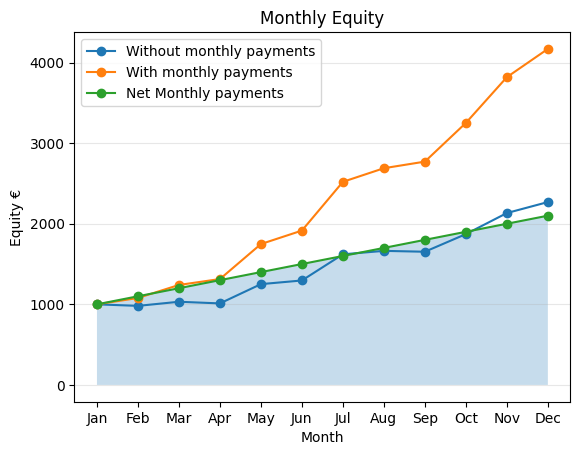

Start Equity=                        = 2000.00
Monthly Payments=                    = 100.00
Net profit without monthly payments= = 2537.98
Net profit with montly payments=     = 3338.24


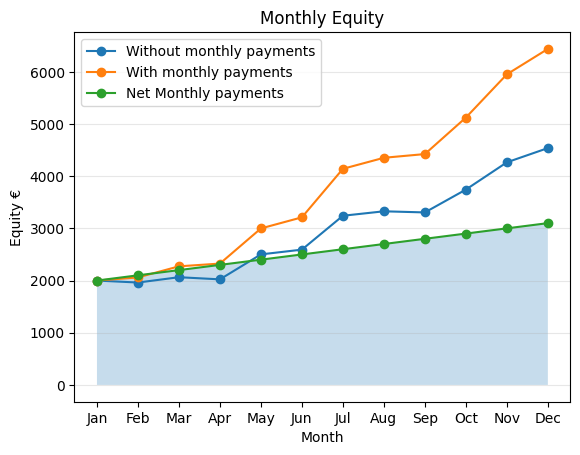

In [13]:


# Initial Equity
init_equity: float = 1000

# Monthly added value
monthly_added_value: float = 100

# Months
months: list[str] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Monthly developments
monthly_dev: list[float] = [0, -1.91, 6.94, -1.99, 31.53, 4.85, 33.40, 3.51, -0.65, 17.66, 18.61, 8.52]

monthly_res_with_monthly_payments = calculate_developments(monthly_dev, init_equity, monthly_added_value)
monthly_res = calculate_developments(monthly_dev, init_equity, 0)

# Print values
print_with_align(init_equity, monthly_added_value, monthly_res[-1] - init_equity, monthly_res_with_monthly_payments[-1] - (init_equity+(monthly_added_value*11)))

# Start equity with the montly payments for each month [2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000]
equity_plus_monthly_payments = list(range(init_equity,init_equity + (monthly_added_value * 12),monthly_added_value))
    
plot_equity(months, monthly_res, monthly_res_with_monthly_payments, equity_plus_monthly_payments)

###############
# Initial Equity
init_equity = 2000

# Monthly added value
monthly_added_value = 100


monthly_res_with_monthly_payments = calculate_developments(monthly_dev, init_equity, monthly_added_value)
monthly_res = calculate_developments(monthly_dev, init_equity, 0)

# Print values
print_with_align(init_equity, monthly_added_value, monthly_res[-1] - init_equity, monthly_res_with_monthly_payments[-1] - (init_equity+(monthly_added_value*11)))

# Start equity with the montly payments for each month [2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000]
equity_plus_monthly_payments = list(range(init_equity,init_equity + (monthly_added_value * 12),monthly_added_value))

plot_equity(months, monthly_res, monthly_res_with_monthly_payments, equity_plus_monthly_payments)

